In [1]:
import pandas as pd
from pylab import *
%matplotlib inline

In [2]:
cali = pd.read_csv("../data/calibrations.csv")
cali["TPAmplitude_e"]= cali.TPAmplitude_mV*1e-3/3*(60*1e-15)/(1.6*1e-19)

In [25]:
const = {}
for backend in ["VME","ubcm"]:
    for ich in range(1,4):
        key = "{}_CH{}".format(backend,ich)
        fit = np.polyfit(cali[key][:-1],cali.TPAmplitude_e[:-1],deg=1)
        const[key] = fit
        
df = pd.DataFrame(const)
df.to_pickle("../data/calibration_linearFit.pkl")

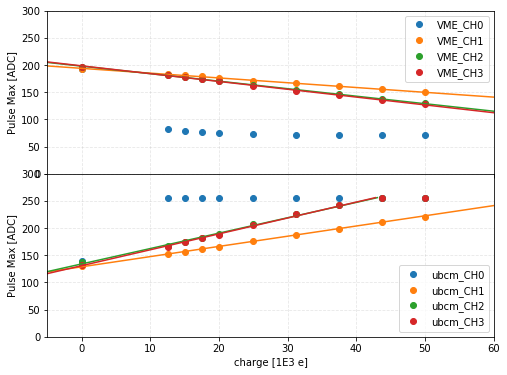

In [26]:
f, (ax1, ax2) = plt.subplots(2,1, sharey=True, facecolor='w',figsize=(8,6))
plt.subplots_adjust(hspace=0)

for i in range(4):
    ax1.plot(cali.TPAmplitude_e/1000, cali["VME_CH{}".format(i)], "o",color="C{}".format(i))
    ax2.plot(cali.TPAmplitude_e/1000, cali["ubcm_CH{}".format(i)], "o",color="C{}".format(i))    

adc = np.arange(0,257,32)
for i in range(1,4,1):
    e = df["VME_CH{}".format(i)][0]*adc+df["VME_CH{}".format(i)][1]
    ax1.plot(e/1000,adc, "-",color="C{}".format(i),c="C{}".format(i))
    e = df["ubcm_CH{}".format(i)][0]*adc+df["ubcm_CH{}".format(i)][1]
    ax2.plot(e/1000, adc, "-",color="C{}".format(i),c="C{}".format(i))

    
ax1.set_ylim(0,300)
ax1.set_xlim(-5,60)
ax1.legend(loc="upper right")
ax1.grid(linestyle='--',alpha=0.3)
ax1.set_ylabel("Pulse Max [ADC]")
ax1.set_xticklabels([])

ax2.set_ylim(0,300)
ax2.set_xlim(-5,60)
ax2.legend(loc="lower right")
ax2.grid(linestyle='--',alpha=0.3)
ax2.set_ylabel("Pulse Max [ADC]")
ax2.set_xlabel("charge [1E3 e]")
plt.savefig('../plots/calibration.png',dpi=300)

In [24]:
df

,VME_CH1,VME_CH2,VME_CH3,ubcm_CH1,ubcm_CH2,ubcm_CH3
0,-1133.643617,-724.157687,-695.721489,532.814945,353.199429,341.844143
1,219753.989362,143273.409858,138067.069554,-68611.355634,-47354.998180,-44729.348177
